# Experiment results

In [1]:
# %cd C:\Users\Sebastian\Desktop\GitHubRepositories\llm-workshop\intermediate
# %cd ..

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import re
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_12992\1355237023.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(shorts, rotation=45, ha="right")


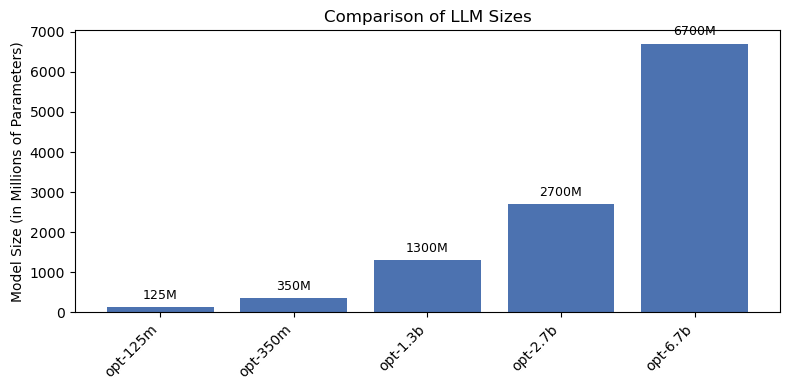

In [3]:
model_statistics = pd.read_csv('model_statistics.csv', index_col=0)
prediction_statistics = pd.read_csv('prediction_statistics.csv', index_col=0)
data_statistics = pd.read_csv('data_statistics.csv', index_col=0)

# Helper to extract numeric size
def extract_size(llm):
    match = re.search(r'opt-(\d+(\.\d+)?)([mMbB])', llm)
    if not match:
        return float('inf')
    size = float(match.group(1))
    unit = match.group(3).lower()
    return size * 1000 if unit == 'b' else size

# 1. Weź wszystkie unikalne modele
models = prediction_statistics["llm_name"].unique().tolist()

# 2. Wyodrębnij krótką nazwę i rozmiar
def extract_short_and_size(full_name):
    short = full_name.split("/")[-1]
    m = re.search(r'(\d+(\.\d+)?)([mMbB])', short)
    if m:
        v, unit = float(m.group(1)), m.group(3).lower()
        size = v * (1000 if unit == 'b' else 1)
    else:
        size = np.nan
    return short, size

shorts, sizes = zip(*(extract_short_and_size(m) for m in models))

# 3. Uporządkuj według rozmiaru
order = np.argsort(sizes)
shorts = np.array(shorts)[order]
sizes = np.array(sizes)[order]

# 4. Wykres słupkowy
fig, ax = plt.subplots(figsize=(8, 4))
bars = ax.bar(shorts, sizes, color="#4c72b0")

# 5. Adnotacje
for bar, sz in zip(bars, sizes):
    ax.text(bar.get_x() + bar.get_width()/2, sz + max(sizes)*0.02,
            f"{int(sz)}M", ha="center", va="bottom", fontsize=9)

# 6. Formatting
ax.set_ylabel("Model Size (in Millions of Parameters)")
ax.set_title("Comparison of LLM Sizes")
ax.set_xticklabels(shorts, rotation=45, ha="right")
plt.tight_layout()
plt.show()

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_10672\840165349.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(shorts, rotation=45, ha="right")


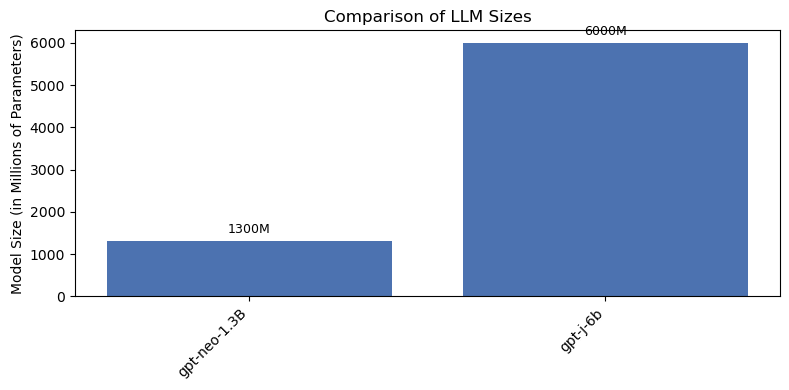

In [24]:
model_statistics = pd.read_csv('model_statistics_gpt.csv', index_col=0)
prediction_statistics = pd.read_csv('prediction_statistics_gpt.csv', index_col=0)
data_statistics = pd.read_csv('data_statistics_gpt.csv', index_col=0)

# 1. Helper: extract numeric size in millions
def extract_size(name):
    m = re.search(r'(\d+(\.\d+)?)([mMbB])', name)
    if not m:
        return float('inf')
    val = float(m.group(1))
    unit = m.group(3).lower()
    return val * (1000 if unit == 'b' else 1)

# 1. Weź wszystkie unikalne modele
models = prediction_statistics["llm_name"].unique().tolist()

# 2. Wyodrębnij krótką nazwę i rozmiar
def extract_short_and_size(full_name):
    short = full_name.split("/")[-1]
    m = re.search(r'(\d+(\.\d+)?)([mMbB])', short)
    if m:
        v, unit = float(m.group(1)), m.group(3).lower()
        size = v * (1000 if unit == 'b' else 1)
    else:
        size = np.nan
    return short, size

shorts, sizes = zip(*(extract_short_and_size(m) for m in models))

# 3. Uporządkuj według rozmiaru
order = np.argsort(sizes)
shorts = np.array(shorts)[order]
sizes = np.array(sizes)[order]

# 4. Wykres słupkowy
fig, ax = plt.subplots(figsize=(8, 4))
bars = ax.bar(shorts, sizes, color="#4c72b0")

# 5. Adnotacje
for bar, sz in zip(bars, sizes):
    ax.text(bar.get_x() + bar.get_width()/2, sz + max(sizes)*0.02,
            f"{int(sz)}M", ha="center", va="bottom", fontsize=9)

# 6. Formatting
ax.set_ylabel("Model Size (in Millions of Parameters)")
ax.set_title("Comparison of LLM Sizes")
ax.set_xticklabels(shorts, rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [4]:
# Get unique label list
with open("dict.txt", "r") as f:
    emotions = [line.strip() for line in f.readlines()]

In [5]:
model_statistics.head(5)

,run_id,dataset_name,classifier,llm,classifier_accuracy,classifier_precision,classifier_recall,classifier_f1,classifier_balanced_accuracy,classifier_cohen_kappa,classifier_mcc,prompt_header_llm_concept,prompt_content_llm_concept,prompt_tail_llm_concept,prompt_header_llm_train,prompt_content_llm_train,prompt_tail_llm_train,prompt_llm_simulation,llm_predicted_concept
0,1,go_emotions,roberta-base-go_emotions,facebook/opt-125m,0.593,0.483662,0.48427,0.469951,0.48427,0.531984,0.533173,"In few words I will guess, what the task is.\n",{x_test} -> {y_test}\n,In the task is:,I am a classificator. I will find sentiment an...,{x_train} -> {y_train}\n,NaN,{x_test} ->,What's it like being
1,1,go_emotions,roberta-base-go_emotions,facebook/opt-350m,0.593,0.483662,0.48427,0.469951,0.48427,0.531984,0.533173,"In few words I will guess, what the task is.\n",{x_test} -> {y_test}\n,In the task is:,I am a classificator. I will find sentiment an...,{x_train} -> {y_train}\n,NaN,{x_test} ->,* ~~
2,1,go_emotions,roberta-base-go_emotions,facebook/opt-1.3b,0.593,0.483662,0.48427,0.469951,0.48427,0.531984,0.533173,"In few words I will guess, what the task is.\n",{x_test} -> {y_test}\n,In the task is:,I am a classificator. I will find sentiment an...,{x_train} -> {y_train}\n,NaN,{x_test} ->,"""Complete the following tasks"
3,1,go_emotions,roberta-base-go_emotions,facebook/opt-2.7b,0.593,0.483662,0.48427,0.469951,0.48427,0.531984,0.533173,"In few words I will guess, what the task is.\n",{x_test} -> {y_test}\n,In the task is:,I am a classificator. I will find sentiment an...,{x_train} -> {y_train}\n,NaN,{x_test} ->,"""Use a door that"
4,1,go_emotions,roberta-base-go_emotions,facebook/opt-6.7b,0.593,0.483662,0.48427,0.469951,0.48427,0.531984,0.533173,"In few words I will guess, what the task is.\n",{x_test} -> {y_test}\n,In the task is:,I am a classificator. I will find sentiment an...,{x_train} -> {y_train}\n,NaN,{x_test} ->,"""You have to make"


In [6]:
prediction_statistics.head(5)

,run_id,dataset_name,classifier_name,llm_name,x_test,y_test,classifier_predicted_label,classifier_predicted_label_after_switch,llm_simulation_predicted_label,llm_simulation_raw_prediction,classifier_predicted_label_confidence,x_test_present_in_train_prompt,classifier_predicted_label_correct,llm_simulation_label_correct,llm_direct_label_correct,llm_simulation_label_correct_after_switch
0,1,go_emotions,roberta-base-go_emotions,facebook/opt-125m,I’m really sorry about your situation :( Altho...,sadness,remorse,remorse,remorse,- remorse,0.678220,True,False,True,False,True
1,1,go_emotions,roberta-base-go_emotions,facebook/opt-125m,It's wonderful because it's awful. At not with.,admiration,admiration,admiration,pride,~~pride,0.661048,False,True,False,False,False
2,1,go_emotions,roberta-base-go_emotions,facebook/opt-125m,"Kings fan here, good luck to you guys! Will be...",excitement,optimism,optimism,No label,"""what's",0.549641,True,False,False,False,False
3,1,go_emotions,roberta-base-go_emotions,facebook/opt-125m,"I didn't know that, thank you for teaching me ...",gratitude,gratitude,gratitude,No label,~~adm,0.983020,True,True,False,False,False
4,1,go_emotions,roberta-base-go_emotions,facebook/opt-125m,They got bored from haunting earth for thousan...,neutral,neutral,neutral,relief,_____ -> relief,0.868827,False,True,False,False,False


In [7]:
data_statistics.head(5)

,run_id,dataset_name,concept,classifier_name,partition,is_llm_train_balanced,num_samples,label_counts,label_proportions,avg_text_length,avg_word_count
0,1,go_emotions,sentiment analysis,roberta-base-go_emotions,train,True,43410,"{'neutral': 12823, 'anger': 1547, 'fear': 510,...","{'neutral': 0.3, 'anger': 0.04, 'fear': 0.01, ...",68.4,12.8
1,1,go_emotions,sentiment analysis,roberta-base-go_emotions,val,True,5426,"{'neutral': 1592, 'approval': 355, 'sadness': ...","{'neutral': 0.29, 'approval': 0.07, 'sadness':...",68.2,12.8
2,1,go_emotions,sentiment analysis,roberta-base-go_emotions,test,True,1000,"{'sadness': 26, 'admiration': 82, 'excitement'...","{'sadness': 0.03, 'admiration': 0.08, 'excitem...",67.4,12.6


## Add labels based on first letters

In [8]:
def infer_emotion_from_raw(raw_text, prefix_len=3):
    raw = raw_text.lower()
    for emotion in emotions:
        pref = emotion[:prefix_len]  # pobieramy 3 pierwsze litery
        if pref in raw:
            return emotion
    return "No label"

prediction_statistics["llm_simulation_predicted_label"] = prediction_statistics.apply(
    lambda row: (
        row["llm_simulation_predicted_label"]
        if isinstance(row["llm_simulation_predicted_label"], str) and row["llm_simulation_predicted_label"].lower() != "no label"
        else infer_emotion_from_raw(str(row["llm_simulation_raw_prediction"]))
    ),
    axis=1
)

# Zaktualizuj poprawność predykcji
prediction_statistics["llm_simulation_label_correct"] = (
    prediction_statistics["llm_simulation_predicted_label"] == prediction_statistics["y_test"]
)

## Concept cloud

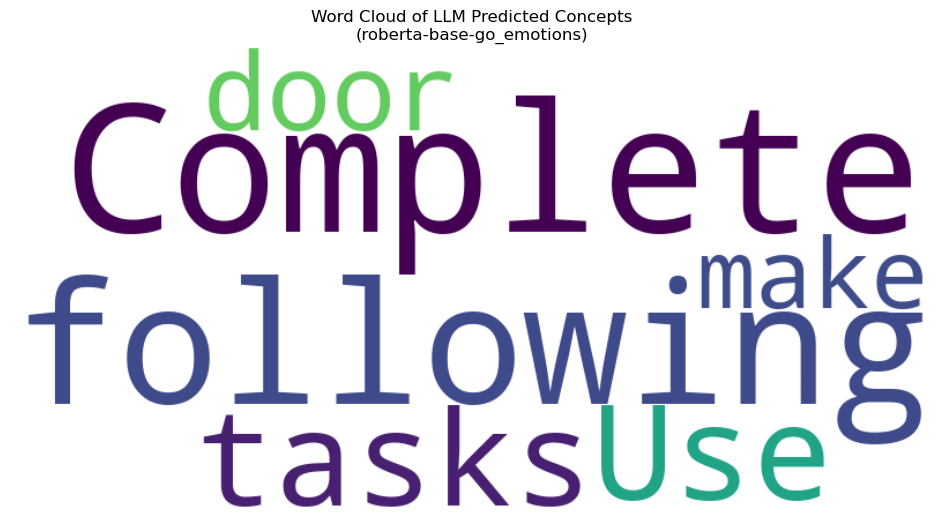

In [7]:
# Use your DataFrame
ms = model_statistics[model_statistics["classifier"] == "roberta-base-go_emotions"]

# Combine predicted concepts into a text blob
text = " ".join(ms["llm_predicted_concept"].dropna().tolist())

# Generate the word cloud
wc = WordCloud(width=800, height=400, background_color="white").generate(text)

# Plot
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of LLM Predicted Concepts\n(roberta-base-go_emotions)")
plt.show()

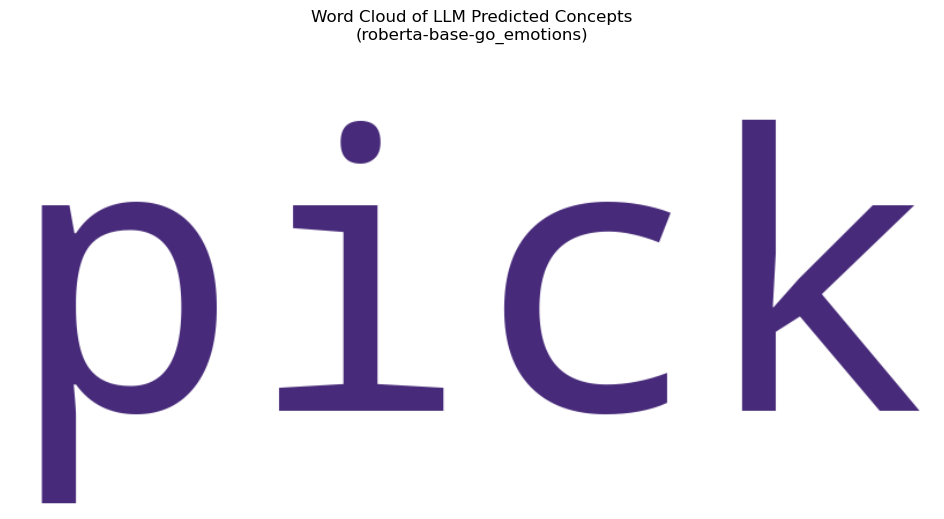

In [17]:
# Use your DataFrame
ms = model_statistics[model_statistics["classifier"] == "roberta-base-go_emotions"]

# Combine predicted concepts into a text blob
text = " ".join(ms["llm_predicted_concept"].dropna().tolist())

# Generate the word cloud
wc = WordCloud(width=800, height=400, background_color="white").generate(text)

# Plot
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of LLM Predicted Concepts\n(roberta-base-go_emotions)")
plt.show()

## Prediction cloud

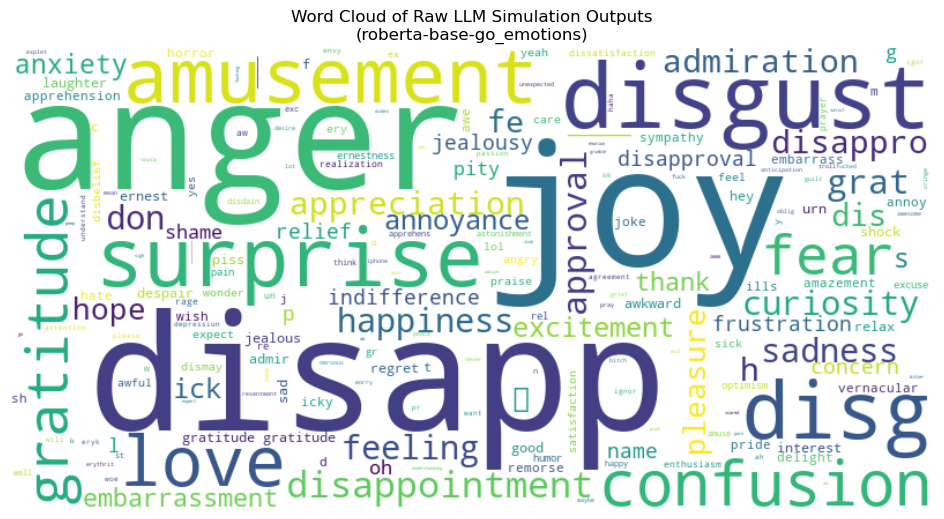

In [8]:
# Filter for the classifier of interest
df = prediction_statistics[prediction_statistics["classifier_name"] == "roberta-base-go_emotions"]

# Combine all raw LLM simulation outputs into a single text
raw_text = " ".join(df["llm_simulation_raw_prediction"].dropna().tolist())

# Generate a word cloud for raw LLM outputs
wc_raw = WordCloud(width=800, height=400, background_color="white").generate(raw_text)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wc_raw, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Raw LLM Simulation Outputs\n(roberta-base-go_emotions)")
plt.show()

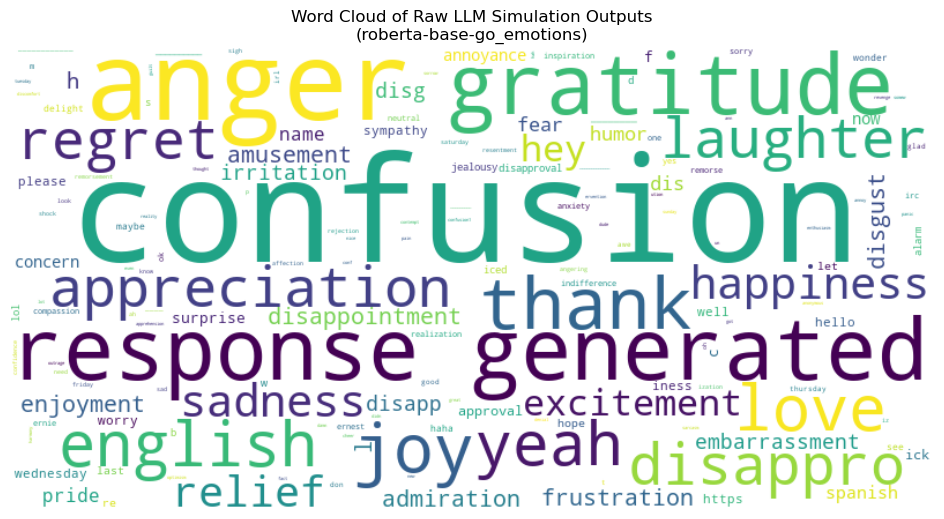

In [18]:
# Filter for the classifier of interest
df = prediction_statistics[prediction_statistics["classifier_name"] == "roberta-base-go_emotions"]

# Combine all raw LLM simulation outputs into a single text
raw_text = " ".join(df["llm_simulation_raw_prediction"].dropna().tolist())

# Generate a word cloud for raw LLM outputs
wc_raw = WordCloud(width=800, height=400, background_color="white").generate(raw_text)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wc_raw, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Raw LLM Simulation Outputs\n(roberta-base-go_emotions)")
plt.show()

## Accuracy vs size

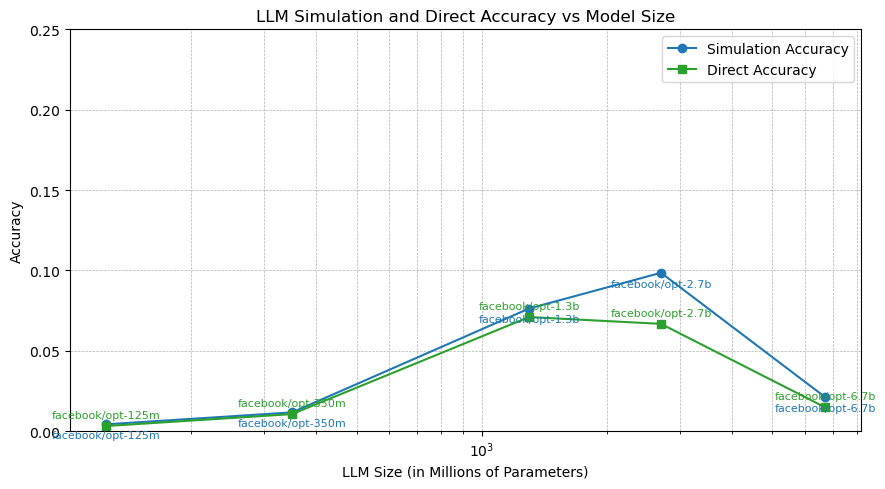

In [9]:
# Helper to extract numeric size in millions
def extract_size(llm):
    match = re.search(r'(\d+(\.\d+)?)([mMbB])', llm)
    if not match:
        return float('inf')
    size = float(match.group(1))
    unit = match.group(3).lower()
    if unit == 'b':
        size *= 1000
    return size
# Filter for classifier and unseen data
df = prediction_statistics[
    (prediction_statistics["classifier_name"] == "roberta-base-go_emotions") &
    (~prediction_statistics["x_test_present_in_train_prompt"])
]
# Group by LLM
acc_df = df.groupby("llm_name").agg({
    "llm_simulation_label_correct": "mean",
    "llm_direct_label_correct": "mean"
}).reset_index()
# Add numeric model size
acc_df["llm_size"] = acc_df["llm_name"].apply(extract_size)
# Sort by model size
acc_df = acc_df.sort_values("llm_size")
# Plot
fig, ax = plt.subplots(figsize=(9, 5))

# Plot both lines
ax.plot(acc_df["llm_size"], acc_df["llm_simulation_label_correct"], 
        marker='o', label="Simulation Accuracy", color='#1f77b4')
ax.plot(acc_df["llm_size"], acc_df["llm_direct_label_correct"], 
        marker='s', label="Direct Accuracy", color='#2ca02c')
# Annotate points
for _, row in acc_df.iterrows():
    ax.annotate(row["llm_name"], (row["llm_size"], row["llm_direct_label_correct"]),
                textcoords="offset points", xytext=(0, 6), ha='center', fontsize=8, color='#2ca02c')
    ax.annotate(row["llm_name"], (row["llm_size"], row["llm_simulation_label_correct"]),
                textcoords="offset points", xytext=(0, -10), ha='center', fontsize=8, color='#1f77b4')
# Formatting
ax.set_xscale('log')
ax.set_xlabel("LLM Size (in Millions of Parameters)")
ax.set_ylabel("Accuracy")
ax.set_title("LLM Simulation and Direct Accuracy vs Model Size")
ax.set_ylim(0, 0.25)
ax.grid(True, which="both", linestyle='--', linewidth=0.5)
ax.legend()
plt.tight_layout()
plt.show()

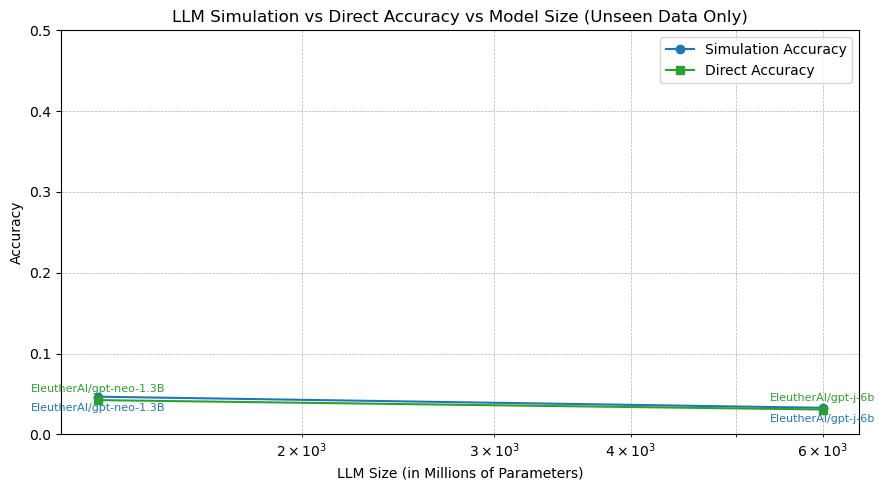

In [20]:
# Helper to extract numeric size in millions
def extract_size(llm):
    match = re.search(r'(\d+(\.\d+)?)([mMbB])', llm)
    if not match:
        return float('inf')
    size = float(match.group(1))
    unit = match.group(3).lower()
    if unit == 'b':
        size *= 1000
    return size
# Filter for classifier and unseen data
df = prediction_statistics[
    (prediction_statistics["classifier_name"] == "roberta-base-go_emotions") &
    (~prediction_statistics["x_test_present_in_train_prompt"])
]
# Group by LLM
acc_df = df.groupby("llm_name").agg({
    "llm_simulation_label_correct": "mean",
    "llm_direct_label_correct": "mean"
}).reset_index()
# Add numeric model size
acc_df["llm_size"] = acc_df["llm_name"].apply(extract_size)
# Sort by model size
acc_df = acc_df.sort_values("llm_size")
# Plot
fig, ax = plt.subplots(figsize=(9, 5))

# Plot both lines
ax.plot(acc_df["llm_size"], acc_df["llm_simulation_label_correct"], 
        marker='o', label="Simulation Accuracy", color='#1f77b4')
ax.plot(acc_df["llm_size"], acc_df["llm_direct_label_correct"], 
        marker='s', label="Direct Accuracy", color='#2ca02c')
# Annotate points
for _, row in acc_df.iterrows():
    ax.annotate(row["llm_name"], (row["llm_size"], row["llm_direct_label_correct"]),
                textcoords="offset points", xytext=(0, 6), ha='center', fontsize=8, color='#2ca02c')
    ax.annotate(row["llm_name"], (row["llm_size"], row["llm_simulation_label_correct"]),
                textcoords="offset points", xytext=(0, -10), ha='center', fontsize=8, color='#1f77b4')
# Formatting
ax.set_xscale('log')
ax.set_xlabel("LLM Size (in Millions of Parameters)")
ax.set_ylabel("Accuracy")
ax.set_title("LLM Simulation vs Direct Accuracy vs Model Size (Unseen Data Only)")
ax.set_ylim(0, 0.5)
ax.grid(True, which="both", linestyle='--', linewidth=0.5)
ax.legend()
plt.tight_layout()
plt.show()

## LLM based on seen vs unseen data

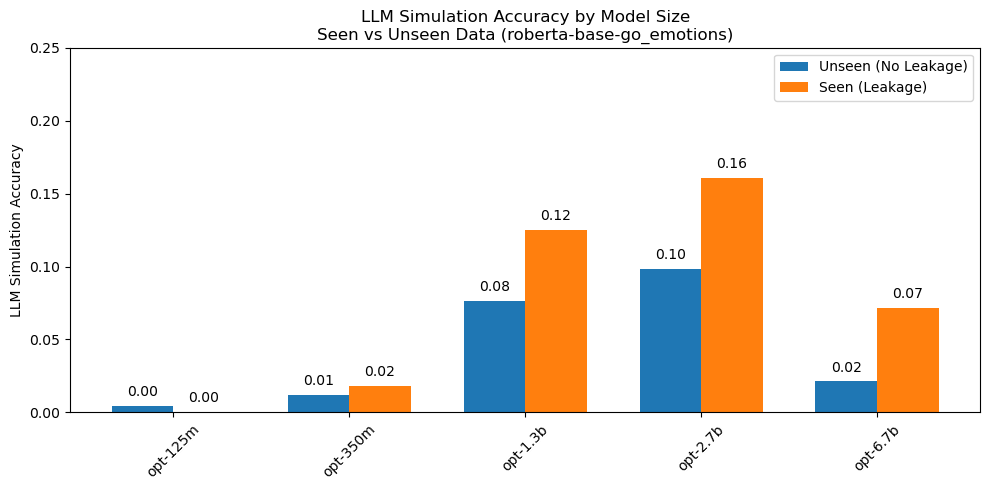

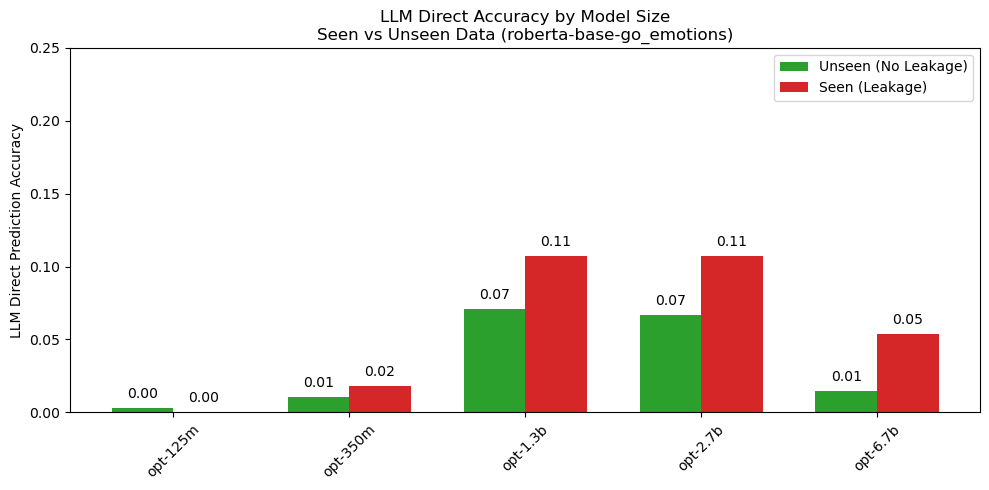

In [44]:
# Uprość nazwę modelu do np. opt-125m
df = prediction_statistics[prediction_statistics["classifier_name"] == "roberta-base-go_emotions"].copy()
df["short_llm_name"] = df["llm_name"].str.extract(r'(opt-\d+\.?\d*[mbMB])', expand=False)
df["llm_size"] = df["llm_name"].apply(extract_size)

# Posortuj wg rozmiaru
df = df.sort_values("llm_size")

# --- SIMULATION ACCURACY ---
sim_grouped = df.groupby(["short_llm_name", "x_test_present_in_train_prompt"])["llm_simulation_label_correct"].mean().unstack(fill_value=0)
sim_grouped["llm_size"] = sim_grouped.index.to_series().apply(lambda name: extract_size(f"opt-{name}"))
sim_grouped = sim_grouped.sort_values("llm_size")

# Wykres
llm_names = sim_grouped.index
seen_acc = sim_grouped[True]
unseen_acc = sim_grouped[False]
x = np.arange(len(llm_names))
width = 0.35
fig, ax = plt.subplots(figsize=(10, 5))
bars1 = ax.bar(x - width/2, unseen_acc, width, label='Unseen (No Leakage)', color='#1f77b4')
bars2 = ax.bar(x + width/2, seen_acc, width, label='Seen (Leakage)', color='#ff7f0e')
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f"{height:.2f}", xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 5), textcoords="offset points", ha='center', va='bottom')
ax.set_ylabel("LLM Simulation Accuracy")
ax.set_title("LLM Simulation Accuracy by Model Size\nSeen vs Unseen Data (roberta-base-go_emotions)")
ax.set_xticks(x)
ax.set_xticklabels(llm_names, rotation=45)
ax.set_ylim(0, 0.25)
ax.legend()
plt.tight_layout()
plt.show()

# --- DIRECT ACCURACY ---
direct_grouped = df.groupby(["short_llm_name", "x_test_present_in_train_prompt"])["llm_direct_label_correct"].mean().unstack(fill_value=0)
direct_grouped["llm_size"] = direct_grouped.index.to_series().apply(lambda name: extract_size(f"opt-{name}"))
direct_grouped = direct_grouped.sort_values("llm_size")

llm_names = direct_grouped.index
seen_acc = direct_grouped[True]
unseen_acc = direct_grouped[False]
x = np.arange(len(llm_names))
fig, ax = plt.subplots(figsize=(10, 5))
bars1 = ax.bar(x - width/2, unseen_acc, width, label='Unseen (No Leakage)', color='#2ca02c')
bars2 = ax.bar(x + width/2, seen_acc, width, label='Seen (Leakage)', color='#d62728')
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f"{height:.2f}", xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 5), textcoords="offset points", ha='center', va='bottom')
ax.set_ylabel("LLM Direct Prediction Accuracy")
ax.set_title("LLM Direct Accuracy by Model Size\nSeen vs Unseen Data (roberta-base-go_emotions)")
ax.set_xticks(x)
ax.set_xticklabels(llm_names, rotation=45)
ax.set_ylim(0, 0.25)
ax.legend()
plt.tight_layout()
plt.show()

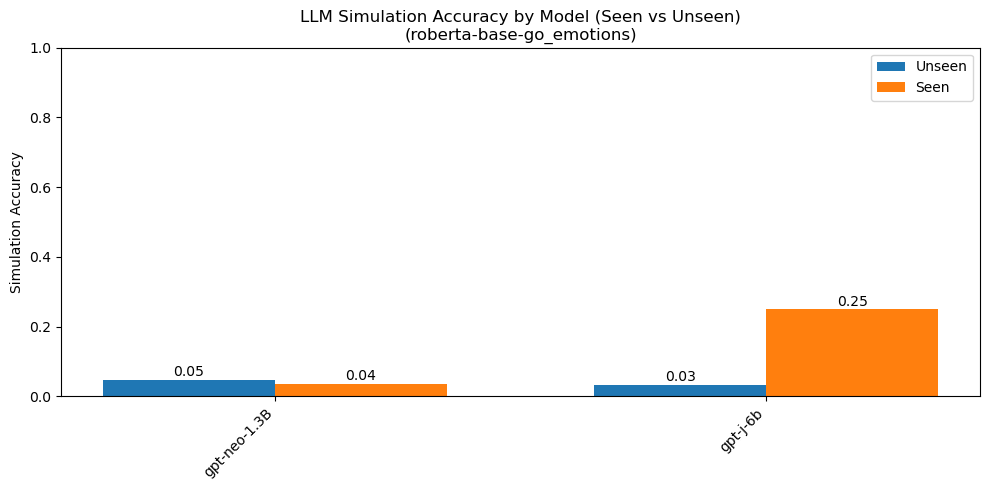

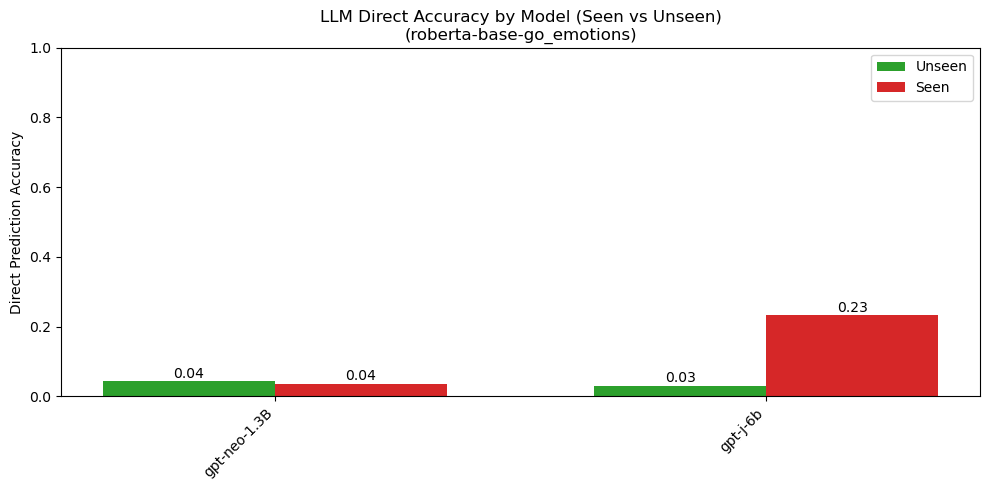

In [21]:

# 2. Filter to your classifier and copy
df = prediction_statistics[
    prediction_statistics["classifier_name"] == "roberta-base-go_emotions"
].copy()

# 3. Extract short name and size
df["short_llm_name"] = df["llm_name"].apply(lambda x: x.split("/")[-1])
df["llm_size"] = df["short_llm_name"].apply(extract_size)

# 4. Sort once by size
df = df.sort_values("llm_size")

# Common bar‑width and x positions
llm_order = df["short_llm_name"].unique()
x = np.arange(len(llm_order))
width = 0.35

# ---- PLOT 1: SIMULATION ACCURACY ----
sim = (
    df
    .groupby(["short_llm_name", "x_test_present_in_train_prompt"])
    ["llm_simulation_label_correct"]
    .mean()
    .unstack(fill_value=0)
    .reindex(llm_order)
)

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(x - width/2, sim[False], width, label="Unseen", color="#1f77b4")
ax.bar(x + width/2, sim[True],  width, label="Seen",   color="#ff7f0e")

# Annotate
for xpos, (u, s) in enumerate(zip(sim[False], sim[True])):
    ax.text(xpos - width/2, u + 0.01, f"{u:.2f}", ha="center")
    ax.text(xpos + width/2, s + 0.01, f"{s:.2f}", ha="center")

ax.set_xticks(x)
ax.set_xticklabels(llm_order, rotation=45, ha="right")
ax.set_ylim(0, 1)
ax.set_ylabel("Simulation Accuracy")
ax.set_title("LLM Simulation Accuracy by Model (Seen vs Unseen)\n(roberta-base-go_emotions)")
ax.legend()
plt.tight_layout()
plt.show()


# ---- PLOT 2: DIRECT ACCURACY ----
direct = (
    df
    .groupby(["short_llm_name", "x_test_present_in_train_prompt"])
    ["llm_direct_label_correct"]
    .mean()
    .unstack(fill_value=0)
    .reindex(llm_order)
)

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(x - width/2, direct[False], width, label="Unseen", color="#2ca02c")
ax.bar(x + width/2, direct[True],  width, label="Seen",   color="#d62728")

# Annotate
for xpos, (u, s) in enumerate(zip(direct[False], direct[True])):
    ax.text(xpos - width/2, u + 0.01, f"{u:.2f}", ha="center")
    ax.text(xpos + width/2, s + 0.01, f"{s:.2f}", ha="center")

ax.set_xticks(x)
ax.set_xticklabels(llm_order, rotation=45, ha="right")
ax.set_ylim(0, 1)
ax.set_ylabel("Direct Prediction Accuracy")
ax.set_title("LLM Direct Accuracy by Model (Seen vs Unseen)\n(roberta-base-go_emotions)")
ax.legend()
plt.tight_layout()
plt.show()

## Classiffier vs llm accuracy

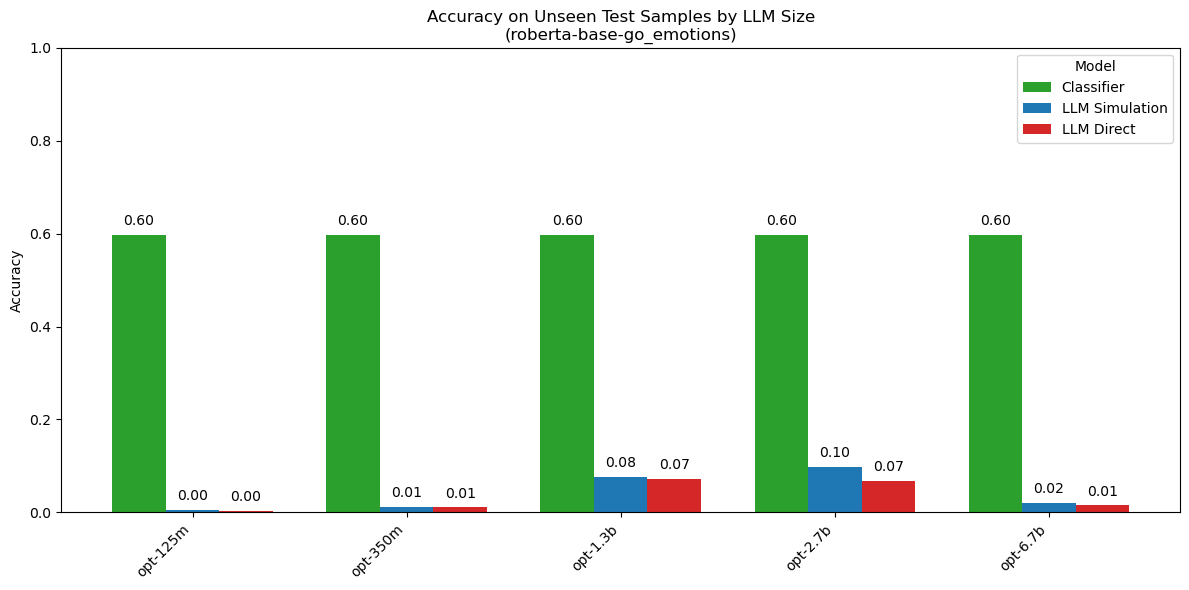

In [12]:
# Filter to relevant classifier and unseen test data
df = prediction_statistics[
    (prediction_statistics["classifier_name"] == "roberta-base-go_emotions") &
    (~prediction_statistics["x_test_present_in_train_prompt"])
].copy()

# Extract short model name and size
df["short_llm_name"] = df["llm_name"].str.extract(r'(opt-\d+\.?\d*[mMbB])', expand=False)
df["llm_size"] = df["llm_name"].apply(extract_size)

# Group by short_llm_name and llm_size, compute mean accuracies
grouped = df.groupby(["short_llm_name", "llm_size"]).agg({
    "classifier_predicted_label_correct": "mean",
    "llm_simulation_label_correct": "mean",
    "llm_direct_label_correct": "mean"
}).reset_index()

# Sort by llm_size
grouped = grouped.sort_values("llm_size")
llm_names = grouped["short_llm_name"].tolist()
x = np.arange(len(llm_names))
width = 0.25

# Bar values
classifier_acc = grouped["classifier_predicted_label_correct"]
simulation_acc = grouped["llm_simulation_label_correct"]
direct_acc = grouped["llm_direct_label_correct"]

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width, classifier_acc, width, label="Classifier", color="#2ca02c")
bars2 = ax.bar(x, simulation_acc, width, label="LLM Simulation", color="#1f77b4")
bars3 = ax.bar(x + width, direct_acc, width, label="LLM Direct", color="#d62728")

# Annotate bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f"{height:.2f}", 
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5), textcoords="offset points",
                    ha='center', va='bottom')

# Formatting
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy on Unseen Test Samples by LLM Size\n(roberta-base-go_emotions)")
ax.set_xticks(x)
ax.set_xticklabels(llm_names, rotation=45, ha='right')
ax.set_ylim(0, 1)
ax.legend(title="Model")
plt.tight_layout()
plt.show()

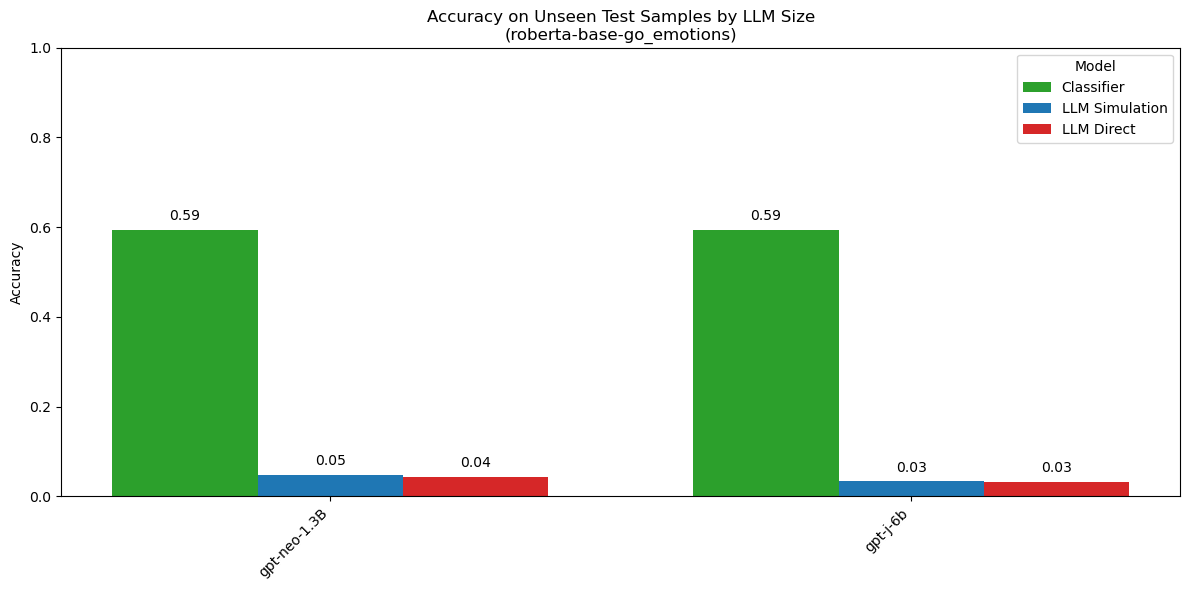

In [23]:
# 1. Filter to classifier & unseen data
df = prediction_statistics[
    (prediction_statistics["classifier_name"] == "roberta-base-go_emotions") &
    (~prediction_statistics["x_test_present_in_train_prompt"])
].copy()

# 2. Universal short name & size extraction
df["short_llm_name"] = df["llm_name"].apply(lambda x: x.split("/")[-1])  
df["llm_size"]       = df["short_llm_name"].apply(extract_size)

# 3. Group by short name & size, compute accuracies
grouped = (
    df
    .groupby(["short_llm_name", "llm_size"])
    .agg({
        "classifier_predicted_label_correct": "mean",
        "llm_simulation_label_correct":      "mean",
        "llm_direct_label_correct":          "mean"
    })
    .reset_index()
    .sort_values("llm_size")
)

# 4. Prepare for plotting
llm_names      = grouped["short_llm_name"].tolist()
x              = np.arange(len(llm_names))
width          = 0.25
classifier_acc = grouped["classifier_predicted_label_correct"]
simulation_acc = grouped["llm_simulation_label_correct"]
direct_acc     = grouped["llm_direct_label_correct"]

# 5. Plot
fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width, classifier_acc, width, label="Classifier",      color="#2ca02c")
bars2 = ax.bar(x,         simulation_acc, width, label="LLM Simulation", color="#1f77b4")
bars3 = ax.bar(x + width, direct_acc,     width, label="LLM Direct",     color="#d62728")

# 6. Annotate
for bar_group in [bars1, bars2, bars3]:
    for bar in bar_group:
        h = bar.get_height()
        ax.annotate(f"{h:.2f}",
                    xy=(bar.get_x() + bar.get_width()/2, h),
                    xytext=(0, 5), textcoords="offset points",
                    ha='center', va='bottom')

# 7. Final formatting
ax.set_xticks(x)
ax.set_xticklabels(llm_names, rotation=45, ha='right')
ax.set_ylabel("Accuracy")
ax.set_ylim(0, 1)
ax.set_title("Accuracy on Unseen Test Samples by LLM Size\n(roberta-base-go_emotions)")
ax.legend(title="Model")
plt.tight_layout()
plt.show()

## Accuracy on test vs confidence

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_10672\578497339.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["llm_name", "bin_mid"])


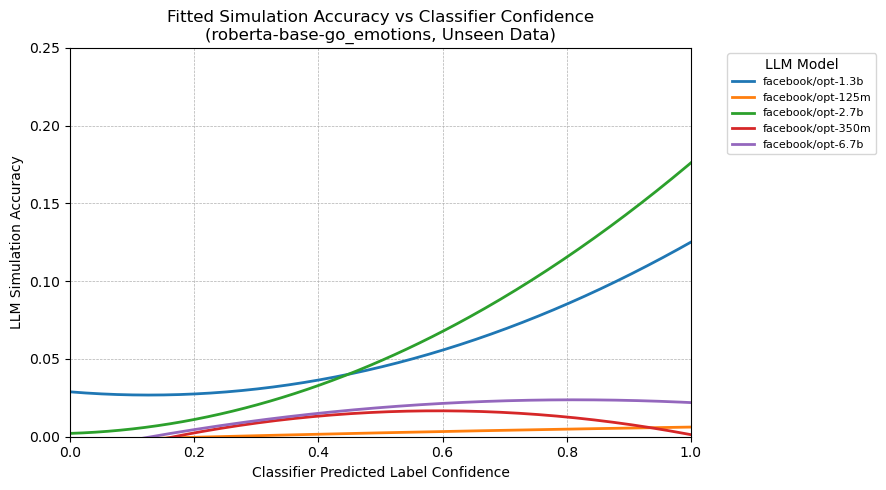

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 1. Filter the data
df = prediction_statistics[
    (prediction_statistics["classifier_name"] == "roberta-base-go_emotions") &
    (~prediction_statistics["x_test_present_in_train_prompt"])
].copy()

# 2. Bin classifier confidence
df["confidence_bin"] = pd.cut(df["classifier_predicted_label_confidence"], bins=np.linspace(0, 1, 11))
df["bin_mid"] = df["confidence_bin"].apply(lambda cb: cb.mid)

# 3. Aggregate mean simulation accuracy per bin
agg_df = (
    df
    .groupby(["llm_name", "bin_mid"])
    .agg(sim_acc=("llm_simulation_label_correct", "mean"))
    .dropna()
    .reset_index()
)

# 4. Fit and plot polynomial regression per LLM
fig, ax = plt.subplots(figsize=(9, 5))
poly = PolynomialFeatures(degree=2)
x_range = np.linspace(0, 1, 200).reshape(-1, 1)

for llm, group in agg_df.groupby("llm_name"):
    x = group["bin_mid"].values.reshape(-1, 1)
    y = group["sim_acc"].values

    if len(x) < 3:
        continue  # need at least 3 points for a degree-2 fit

    X_poly = poly.fit_transform(x)
    model = LinearRegression().fit(X_poly, y)
    y_fit = model.predict(poly.transform(x_range))

    ax.plot(x_range.ravel(), y_fit, label=llm, linewidth=2)

# 5. Formatting
ax.set_xlabel("Classifier Predicted Label Confidence")
ax.set_ylabel("LLM Simulation Accuracy")
ax.set_title("Fitted Simulation Accuracy vs Classifier Confidence\n(roberta-base-go_emotions, Unseen Data)")
ax.set_xlim(0, 1)
ax.set_ylim(0, 0.25)
ax.grid(True, linestyle="--", linewidth=0.5)
ax.legend(title="LLM Model", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=8)
plt.tight_layout()
plt.show()


C:\Users\Sebastian\AppData\Local\Temp\ipykernel_10672\578497339.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["llm_name", "bin_mid"])


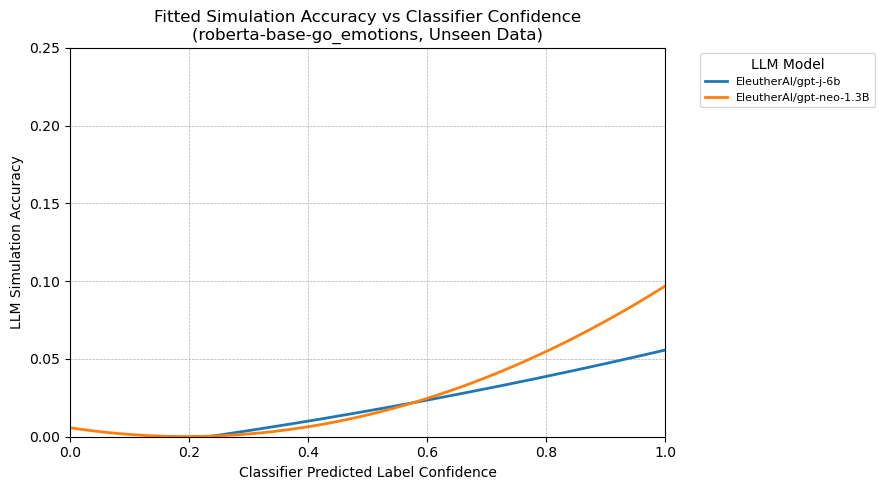

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 1. Filter the data
df = prediction_statistics[
    (prediction_statistics["classifier_name"] == "roberta-base-go_emotions") &
    (~prediction_statistics["x_test_present_in_train_prompt"])
].copy()

# 2. Bin classifier confidence
df["confidence_bin"] = pd.cut(df["classifier_predicted_label_confidence"], bins=np.linspace(0, 1, 11))
df["bin_mid"] = df["confidence_bin"].apply(lambda cb: cb.mid)

# 3. Aggregate mean simulation accuracy per bin
agg_df = (
    df
    .groupby(["llm_name", "bin_mid"])
    .agg(sim_acc=("llm_simulation_label_correct", "mean"))
    .dropna()
    .reset_index()
)

# 4. Fit and plot polynomial regression per LLM
fig, ax = plt.subplots(figsize=(9, 5))
poly = PolynomialFeatures(degree=2)
x_range = np.linspace(0, 1, 200).reshape(-1, 1)

for llm, group in agg_df.groupby("llm_name"):
    x = group["bin_mid"].values.reshape(-1, 1)
    y = group["sim_acc"].values

    if len(x) < 3:
        continue  # need at least 3 points for a degree-2 fit

    X_poly = poly.fit_transform(x)
    model = LinearRegression().fit(X_poly, y)
    y_fit = model.predict(poly.transform(x_range))

    ax.plot(x_range.ravel(), y_fit, label=llm, linewidth=2)

# 5. Formatting
ax.set_xlabel("Classifier Predicted Label Confidence")
ax.set_ylabel("LLM Simulation Accuracy")
ax.set_title("Fitted Simulation Accuracy vs Classifier Confidence\n(roberta-base-go_emotions, Unseen Data)")
ax.set_xlim(0, 1)
ax.set_ylim(0, 0.25)
ax.grid(True, linestyle="--", linewidth=0.5)
ax.legend(title="LLM Model", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=8)
plt.tight_layout()
plt.show()


## Confusion matirix

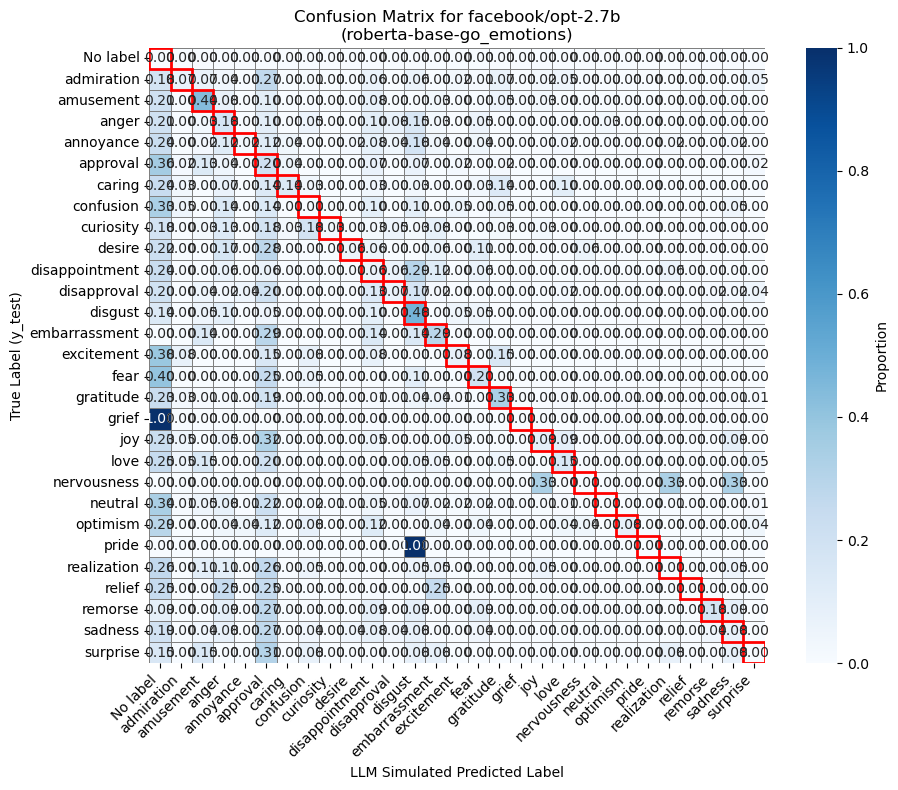

In [14]:
# 1. Filter for classifier and only opt-2.7b
df = prediction_statistics[
    (prediction_statistics["classifier_name"] == "roberta-base-go_emotions") &
    (prediction_statistics["llm_name"] == "facebook/opt-2.7b")
].copy()

# 2. True vs Predicted
true_labels = df["y_test"]
pred_labels = df["llm_simulation_predicted_label"]

# 3. All classes (including 'No label')
all_labels = sorted(set(true_labels.unique()) | set(pred_labels.unique()))

# 4. Compute raw counts and normalize by row
cm = confusion_matrix(true_labels, pred_labels, labels=all_labels)
row_sums = cm.sum(axis=1, keepdims=True)
cm_norm = np.divide(cm, row_sums, where=row_sums!=0)

# 5. Plot
plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    cm_norm, annot=True, fmt=".2f", cmap="Blues",
    xticklabels=all_labels, yticklabels=all_labels,
    cbar_kws={'label': 'Proportion'}, square=True,
    linewidths=0.5, linecolor='gray'
)

# Highlight diagonal
for i in range(len(all_labels)):
    ax.add_patch(plt.Rectangle((i, i), 1, 1, fill=False, edgecolor='red', lw=2))

plt.xlabel("LLM Simulated Predicted Label")
plt.ylabel("True Label (y_test)")
plt.title("Confusion Matrix for facebook/opt-2.7b\n(roberta-base-go_emotions)")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

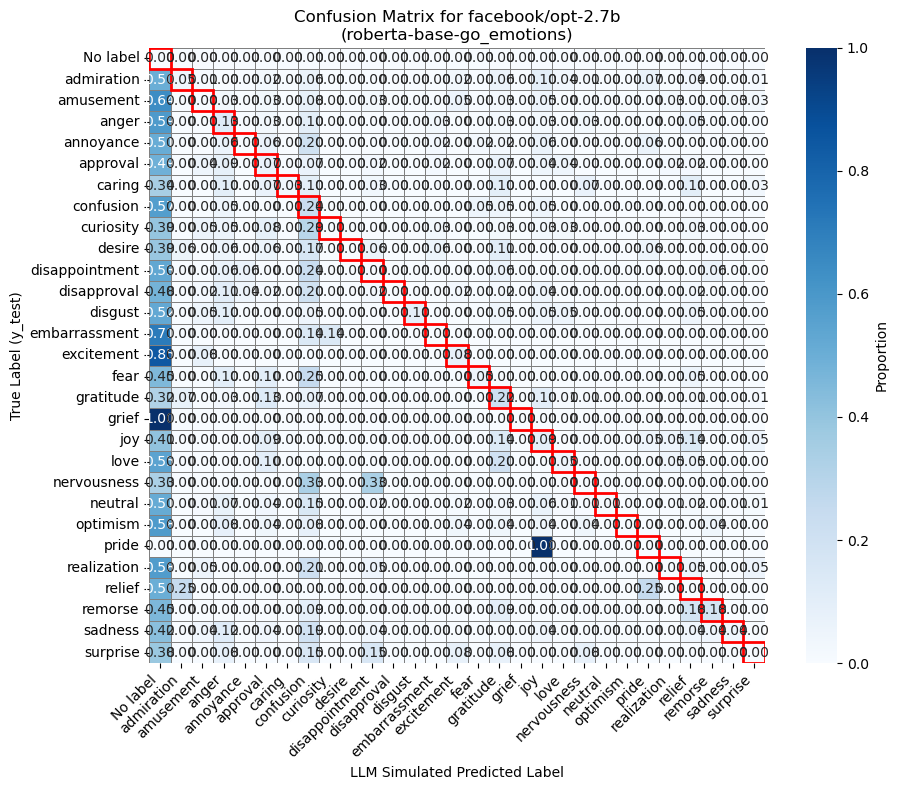

In [30]:
# 1. Filter for classifier and only opt-2.7b
df = prediction_statistics[
    (prediction_statistics["classifier_name"] == "roberta-base-go_emotions") &
    (prediction_statistics["llm_name"] == "EleutherAI/gpt-neo-1.3B")
].copy()

# 2. True vs Predicted
true_labels = df["y_test"]
pred_labels = df["llm_simulation_predicted_label"]

# 3. All classes (including 'No label')
all_labels = sorted(set(true_labels.unique()) | set(pred_labels.unique()))

# 4. Compute raw counts and normalize by row
cm = confusion_matrix(true_labels, pred_labels, labels=all_labels)
row_sums = cm.sum(axis=1, keepdims=True)
cm_norm = np.divide(cm, row_sums, where=row_sums!=0)

# 5. Plot
plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    cm_norm, annot=True, fmt=".2f", cmap="Blues",
    xticklabels=all_labels, yticklabels=all_labels,
    cbar_kws={'label': 'Proportion'}, square=True,
    linewidths=0.5, linecolor='gray'
)

# Highlight diagonal
for i in range(len(all_labels)):
    ax.add_patch(plt.Rectangle((i, i), 1, 1, fill=False, edgecolor='red', lw=2))

plt.xlabel("LLM Simulated Predicted Label")
plt.ylabel("True Label (y_test)")
plt.title("Confusion Matrix for facebook/opt-2.7b\n(roberta-base-go_emotions)")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Label vs no label

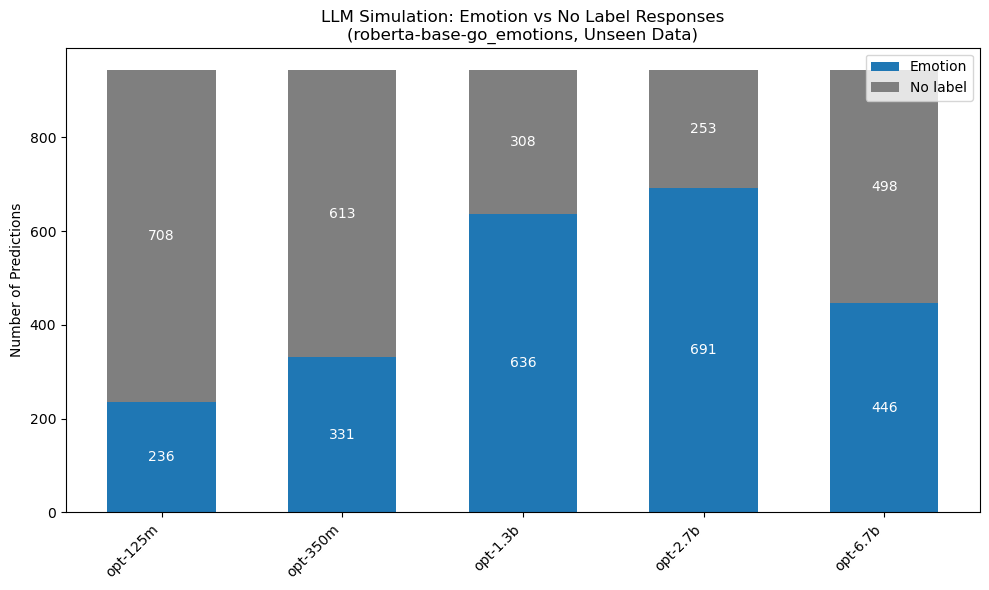

In [15]:
# 1. Filter to our classifier and unseen data (optional; remove leakage filter if you want all data)
df = prediction_statistics[
    (prediction_statistics["classifier_name"] == "roberta-base-go_emotions") &
    (~prediction_statistics["x_test_present_in_train_prompt"])
].copy()

# 2. Extract short model names (“opt-125m”, etc.) and sort by size
def extract_size(llm):
    m = re.search(r'opt-(\d+(\.\d+)?)([mMbB])', llm)
    if not m: return float('inf')
    v, unit = float(m.group(1)), m.group(3).lower()
    return v * 1000 if unit=='b' else v

df["short_llm"] = df["llm_name"].str.extract(r'(opt-\d+\.?\d*[mMbB])', expand=False)
df["size"] = df["llm_name"].apply(extract_size)
order = df.drop_duplicates("short_llm")[["short_llm","size"]].sort_values("size")["short_llm"]

# 3. Label each row as “Emotion” vs “No label”
df["had_emotion"] = df["llm_simulation_predicted_label"].ne("No label")

# 4. Count per model
counts = (
    df
    .groupby("short_llm")["had_emotion"]
    .value_counts()
    .unstack(fill_value=0)
    .reindex(order)
)
# ensure columns exist
counts = counts.rename(columns={False: "No label", True: "Emotion"})

# 5. Plot stacked bar
x = np.arange(len(counts))
width = 0.6

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, counts["Emotion"], width, label="Emotion", color="#1f77b4")
ax.bar(x, counts["No label"], width, bottom=counts["Emotion"], label="No label", color="#7f7f7f")

# Annotate totals or percentages if desired
for i in x:
    total = counts.iloc[i].sum()
    ax.text(i, counts.iloc[i]["Emotion"]/2,
            f"{counts.iloc[i]['Emotion']}", ha='center', va='center', color='white')
    ax.text(i, counts.iloc[i]["Emotion"] + counts.iloc[i]["No label"]/2,
            f"{counts.iloc[i]['No label']}", ha='center', va='center', color='white')

# Formatting
ax.set_xticks(x)
ax.set_xticklabels(counts.index, rotation=45, ha='right')
ax.set_ylabel("Number of Predictions")
ax.set_title("LLM Simulation: Emotion vs No Label Responses\n(roberta-base-go_emotions, Unseen Data)")
ax.legend()
plt.tight_layout()
plt.show()

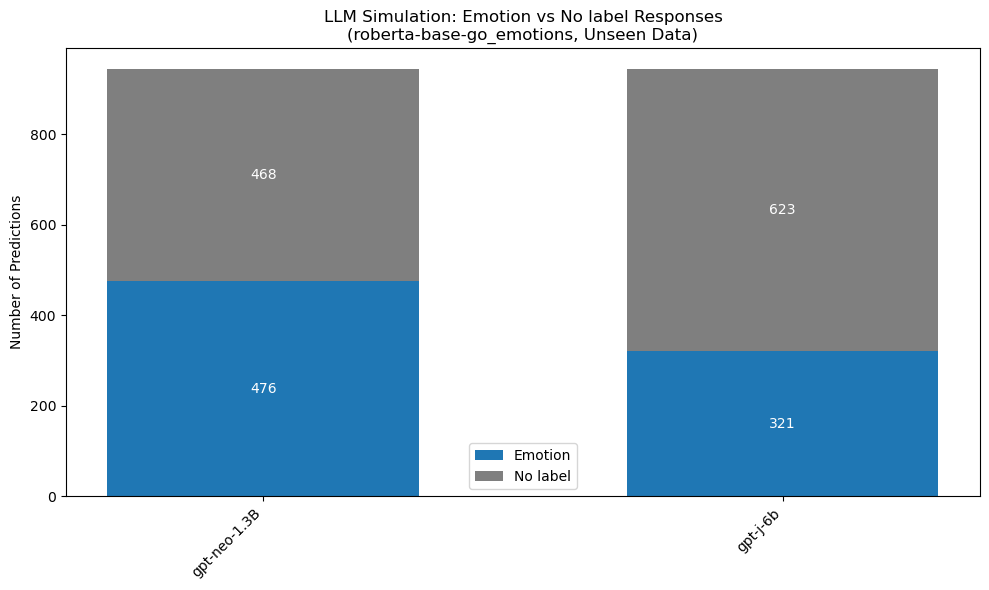

In [33]:
# 1. Filter to your classifier and unseen data
df = prediction_statistics[
    (prediction_statistics["classifier_name"] == "roberta-base-go_emotions") &
    (~prediction_statistics["x_test_present_in_train_prompt"])
].copy()

# 2. Extract a short name (everything after the last slash) and numeric size
def extract_size(name):
    m = re.search(r'(\d+(\.\d+)?)([mMbB])', name)
    if not m:
        return float('inf')
    v, unit = float(m.group(1)), m.group(3).lower()
    return v * (1000 if unit == 'b' else 1)

df["short_llm"] = df["llm_name"].apply(lambda x: x.split("/")[-1])
df["size"] = df["short_llm"].apply(extract_size)

# 3. Sort models by size
order = (
    df[["short_llm", "size"]]
    .drop_duplicates()
    .sort_values("size")["short_llm"]
    .tolist()
)

# 4. Label each row as “Emotion” vs “No label”
df["had_emotion"] = df["llm_simulation_predicted_label"].ne("No label")

# 5. Count per model
counts = (
    df
    .groupby("short_llm")["had_emotion"]
    .value_counts()
    .unstack(fill_value=0)
    .reindex(order)
    .rename(columns={False: "No label", True: "Emotion"})
)

# 6. Plot stacked bar
x = np.arange(len(counts))
width = 0.6

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, counts["Emotion"], width, label="Emotion", color="#1f77b4")
ax.bar(x, counts["No label"], width, bottom=counts["Emotion"], label="No label", color="#7f7f7f")

# 7. Annotate counts
for i in x:
    e = counts.iloc[i]["Emotion"]
    n = counts.iloc[i]["No label"]
    ax.text(i, e/2,      str(e), ha="center", va="center", color="white")
    ax.text(i, e + n/2,  str(n), ha="center", va="center", color="white")

# 8. Formatting
ax.set_xticks(x)
ax.set_xticklabels(counts.index, rotation=45, ha="right")
ax.set_ylabel("Number of Predictions")
ax.set_title("LLM Simulation: Emotion vs No label Responses\n(roberta-base-go_emotions, Unseen Data)")
ax.legend()
plt.tight_layout()
plt.show()